# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Neve Foresti
- Emily Chou
- Sahba Mobini Farahani
- Belen Romero
- Marie Paris

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [299]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb #to run this you will need to type into your terminal: pip install import-ipynb

pd.set_option('precision', 2)
pd.set_option('display.max_rows', 10)

# Data Cleaning

## 1. Preparing University Data (Neve)

First, using the Beautiful Soup package, we created a script to web scrape the 37 pages of ranked public and private [Best Colleges of Niche.com](https://www.niche.com/colleges/search/best-colleges/). 
For pages 1-37, we sent requests to https://www.niche.com/api/renaissance/results/?type=private&type=public&listURL=best-colleges&page=, which contained information about rankings, names, and links to more information about each of the colleges. For each of these colleges, we then added the unique college link to https://www.niche.com/colleges/. For example, https://www.niche.com/colleges/massachusetts-institute-of-technology/. Lastly, we used Beautiful Soup to extract and print all of the undergraduate population and student racial demographic data to a csv. For the few universities that had missing data, we manually searched the university in Niche.com and entered the demographic data.


In [300]:
#get racial demographic data
df_niche = pd.read_csv("datasets/niche4yearpublicprivate.csv")
df_niche.head(5)

ranking                                   name African American Asian  \
0        1  massachusetts-institute-of-technology               6%   25%   
1        2                    stanford-university               6%   20%   
2        3                     harvard-university               6%   20%   
3        4                        yale-university               6%   15%   
4        5                   princeton-university               7%   20%   

  Hispanic International Multiracial Native American Pacific Islander Unknown  \
0      15%           12%          6%              0%               0%      2%   
1      14%           14%         10%              1%               0%      1%   
2      11%            8%          5%              0%               0%      4%   
3      11%           19%          5%              1%               0%      3%   
4       9%           12%          4%              0%               0%      6%   

  White  
0   34%  
1   34%  
2   44%  
3   40%  
4   41%

#### As you can see, there are quite a few things that need to be done. 
1. All of the values in this dataframe are strings. Hence, we need to convert the demographic data to numeric values. 
2. The demographic measurements do not match up with the measurements for the city/county census data. Census data does not have an "international" category, so in order to compare college with county data, we dropped the International category. We recognize that many of the international students may actually fall into the other categories (and hence result in underrepresenting numbers for some races), but there is no way to know. This is a limitation of how demographic data is collected for colleges, so we will be cautious.

In [301]:
#check if any null values. If null,manually enter data from niche.com
df_niche[df_niche.isnull().any(axis=1)]

df_niche = df_niche.drop("International", axis=1)


for indexr, university in df_niche.iterrows():
    sum = 0
    for indexc, newvalue in university.iteritems():
        if "%" in str(newvalue):
            oldvalue = (newvalue)
            newvalue = (float(newvalue.rstrip("%"))) / 100
            df_niche.loc[indexr,indexc] = newvalue
            sum = sum + newvalue #get the sum of all percentages in a row (will not add up to 1.0)
    # Here we want to get the proportion of the demographics to each other (after having removed International)
    for indexc, newvalue in university.iteritems():
        if isinstance(df_niche.loc[indexr,indexc], float):
            #find relative proportion of demographics by diving with row total
            df_niche.loc[indexr,indexc] = round((float(df_niche.loc[indexr,indexc]) / sum),2)

df_800 = df_niche #top 800 #top 800 colleges will be used for analysis 1
df_500 = df_niche.head(500) #top 500 colleges will be used for analysis 2
df_800

ranking                                          name African American  \
0          1         massachusetts-institute-of-technology             0.07   
1          2                           stanford-university             0.07   
2          3                            harvard-university             0.07   
3          4                               yale-university             0.07   
4          5                          princeton-university             0.08   
..       ...                                           ...              ...   
875      876                    houston-baptist-university             0.19   
876      877        school-of-the-art-institute-of-chicago             0.04   
877      878                         seton-hill-university             0.05   
878      879  california-state-university---san-bernardino             0.06   
879      880                            simpson-university             0.04   

    Asian Hispanic Multiracial Native American Pacific Islander Unknown White  
0    0.28     0.17        0.07               0                0    0.02  0.39  
1    0.23     0.16        0.12            0.01                0    0.01   0.4  
2    0.22     0.12        0.06               0                0    0.04  0.49  
3    0.19     0.14        0.06            0.01                0    0.04  0.49  
4    0.23      0.1        0.05               0                0    0.07  0.47  
..    ...      ...         ...             ...              ...     ...   ...  
875   0.1     0.32        0.04               0                0    0.08  0.27  
876  0.16     0.16        0.04               0                0    0.07  0.51  
877  0.01     0.03        0.02               0                0    0.06  0.83  
878  0.06     0.66        0.03               0                0    0.04  0.14  
879  0.04     0.14        0.03            0.03                0    0.11  0.61  

[880 rows x 10 columns]

## 2. Preparing County Data (Emily)

In [302]:
import city_and_county_datasets as citydata
df_cities = citydata.df_cities
df_cities.head(20)
df_counties = citydata.df_counties
df_counties.head(20)

African American  Asian  Hispanic  Multiracial  \
middlesex-ma                  0.06   0.12      0.08         0.02   
santaclara-ca                 0.03   0.38      0.26         0.04   
newhaven-ct                   0.15   0.04      0.18         0.02   
delaware-oh                   0.04   0.07      0.03         0.02   
walworth-wi                   0.01   0.01      0.11         0.01   
morgan-il                     0.06   0.01      0.02         0.02   
westmoreland-pa               0.03   0.01      0.01         0.01   
sanbernardino-ca              0.09   0.08      0.53         0.04   
shasta-ca                     0.01   0.03      0.10         0.04   
alameda-ca                    0.11   0.31      0.23         0.05   

                  Native American  Pacific Islander  Unknown  White  
middlesex-ma                 0.00              0.00     0.08   0.72  
santaclara-ca                0.01              0.01     0.21   0.32  
newhaven-ct                  0.01              0.00     0.15   0.63  
delaware-oh                  0.00              0.00     0.02   0.85  
walworth-wi                  0.01              0.00     0.11   0.85  
morgan-il                    0.00              0.00     0.02   0.89  
westmoreland-pa              0.00              0.00     0.01   0.94  
sanbernardino-ca             0.02              0.01     0.47   0.29  
shasta-ca                    0.03              0.00     0.09   0.80  
alameda-ca                   0.01              0.01     0.19   0.32

# Data Analysis & Results

## Analysis 1 (Neve and Emily)
### For the first part of the analysis, we are interested in looking at how racial demographic data of colleges compares with their surrounding county. 

In [303]:
def bar_plot_county_city(county_name, college_name, top_mid_bot, county_color, college_color):
    ind = np.arange(8) 
    width = 0.42

    plt.bar(ind, df_counties.loc[county_name].values, width, label = ""+county_name+" (county)", color = county_color)
    df_temp = (df_800.loc[df_800['name'] == college_name]).drop(columns = ['ranking', 'name'])
    plt.bar(ind + width, df_temp.values[0], width, label = ""+college_name+" (college)", color = college_color)

    plt.xticks(ind + width / 2, df_counties.columns)
    plt.ylabel('Percentage of Total Population')
    plt.title('Ethnicity Percentages for ' + top_mid_bot + ' 3 Ranked County & University')
    plt.legend(loc='best')
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')


In the following bar graphs, the absence of a bar denotes less than 0 percent of the population.

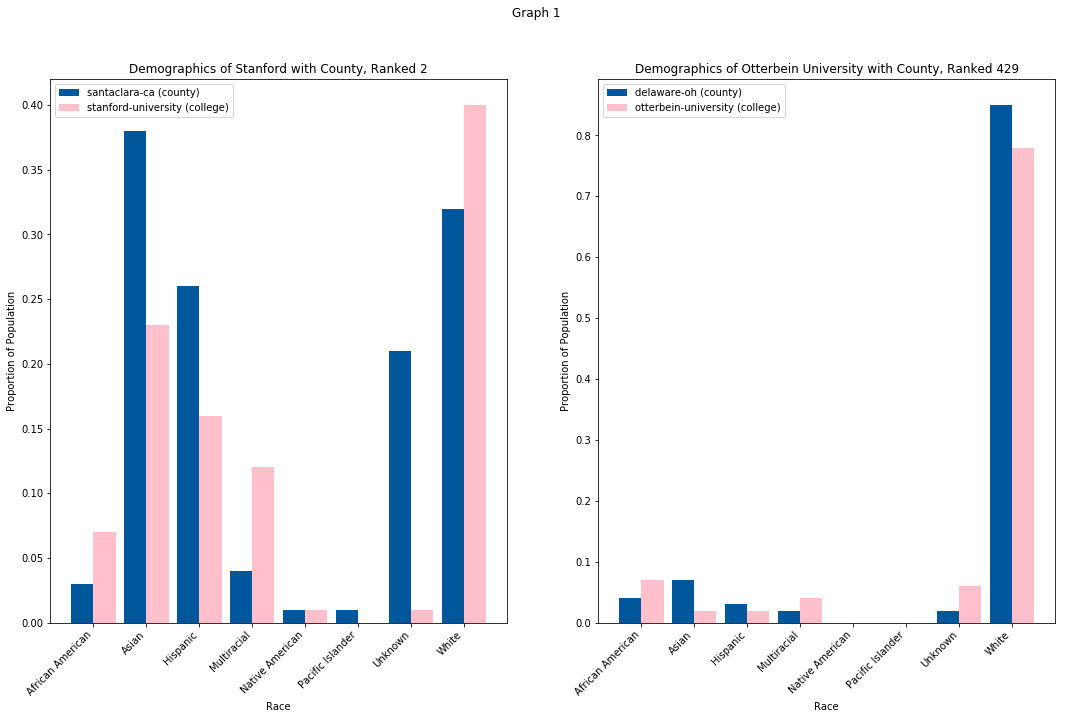

In [304]:
f = plt.figure(figsize=(18,10))
f.suptitle('Graph 1')

plt.subplot(1,2,1)
bar_plot_county_city('santaclara-ca', 'stanford-university', 'Top', '#01579b', "pink")
plt.title("Demographics of Stanford with County, Ranked 2")
plt.xlabel('Race')
plt.ylabel('Proportion of Population')

plt.subplot(1,2,2)
bar_plot_county_city('delaware-oh', 'otterbein-university', 'Middle', '#01579b', 'pink')
plt.title("Demographics of Otterbein University with County, Ranked 429")
plt.xlabel('Race')
plt.ylabel('Proportion of Population')

plt.show()

The graphs above show the possible variation. Stanford, with a high "Best Colleges" ranking of 2 clearly has racial demographic data very different from the surrounding county. On the other hand, Otterbein University, a college ranked at 429 has less diversity, but has demographics very similar to the surrounding county of Delaware, Ohio.

We are therefore interested in looking at whether ranking is correlated with not only how diverse racial demographics of a campus are, but also how that spread compares with the surrounding city.

## Question: Is there a relationship between the ranking tier (top, middle, bottom) and the similarity between the college and surrounding county demographics?

#### Hypothesis: Top-ranked universities tend to be magnet schools and pull students from all over the nation. Also, in our experience, there is more pressure for top-ranked schools to be racially diverse, whereas counties don't often have racial demographics split equally. Hence, our intuition is that their demographics will not match the counties. Lower-ranked universities often have local students. We hypothesize that lower ranked schools will have higher racial demographic similarity with the surrounding county. 

#### Summary: To answer this question, we create a "diversity metric", a single value for each college or county, to compare. We do this for the top 3 (1-3), middle 3 (429-431), and bottom 3 (878-880) ranked colleges. 

#### Limitations: We recognize that 9 datapoints in 3 different categories ("top", "middle", and "bottom") is not enough to create accurate inferences. However, for each county, we need to manually download data. Hence, due to time constraints, we cannot do this analysis with as much data as we would like. We will be cautious of this while making inferences. 

### Step 1: Before we compare each of the colleges with their counties, we do the analysis for colleges and counties separately.

First, we create the dataframe just including the college data for the top 3, middle 3, and bottom 3 colleges.

In [305]:
df_topmidbot = df_800[:3]
df_topmidbot = df_topmidbot.append([df_800[428:431], df_800[877:881]])
df_topmidbot = df_topmidbot.drop(columns=["name"]) # name is unnecessary information for this analysis
df_topmidbot.index = df_topmidbot["ranking"]
df_topmidbot.ranking = pd.to_numeric(df_topmidbot["ranking"]) #ranking was previously a string value
df_topmidbot

ranking African American Asian Hispanic Multiracial Native American  \
ranking                                                                        
1              1             0.07  0.28     0.17        0.07               0   
2              2             0.07  0.23     0.16        0.12            0.01   
3              3             0.07  0.22     0.12        0.06               0   
429          429             0.07  0.02     0.02        0.04               0   
430          430             0.04  0.02     0.06        0.04               0   
431          431             0.13  0.01     0.09        0.04               0   
878          878             0.05  0.01     0.03        0.02               0   
879          879             0.06  0.06     0.66        0.03               0   
880          880             0.04  0.04     0.14        0.03            0.03   

        Pacific Islander Unknown White  
ranking                                 
1                      0    0.02  0.39  
2                      0    0.01   0.4  
3                      0    0.04  0.49  
429                    0    0.06  0.78  
430                    0       0  0.84  
431                    0       0  0.73  
878                    0    0.06  0.83  
879                    0    0.04  0.14  
880                    0    0.11  0.61

Then, we must create the "diversity metric". We initially tested using the mean as the metric, but for most colleges the metric was .19 or .20. This meant that all of the colleges and counties had the same diversity value, which is clearly not the case, as seen in Graph 1. Hence, we decided to use the variance for each college row as the metric because the value gives more information about dispersion of the racifal demographics.

In [306]:
df_topmidbot["var"] =  df_topmidbot.loc[:, ["African American", "Asian", "Hispanic","Multiracial","White"]].var(axis=1)
df_topmidbot

ranking African American Asian Hispanic Multiracial Native American  \
ranking                                                                        
1              1             0.07  0.28     0.17        0.07               0   
2              2             0.07  0.23     0.16        0.12            0.01   
3              3             0.07  0.22     0.12        0.06               0   
429          429             0.07  0.02     0.02        0.04               0   
430          430             0.04  0.02     0.06        0.04               0   
431          431             0.13  0.01     0.09        0.04               0   
878          878             0.05  0.01     0.03        0.02               0   
879          879             0.06  0.06     0.66        0.03               0   
880          880             0.04  0.04     0.14        0.03            0.03   

        Pacific Islander Unknown White   var  
ranking                                       
1                      0    0.02  0.39  0.02  
2                      0    0.01   0.4  0.02  
3                      0    0.04  0.49  0.03  
429                    0    0.06  0.78  0.11  
430                    0       0  0.84  0.13  
431                    0       0  0.73  0.09  
878                    0    0.06  0.83  0.13  
879                    0    0.04  0.14  0.07  
880                    0    0.11  0.61  0.06

In [307]:
# College Data
# To get "top", "middle", "bottom" categories, change ranking to values of 0-2.
df_topmidbot.ranking.loc[(df_topmidbot['ranking'] < 4)] = 0
df_topmidbot.ranking.loc[(df_topmidbot['ranking'] >= 4) & (df_topmidbot['ranking'] < 432)] = 1
df_topmidbot.ranking.loc[(df_topmidbot['ranking'] > 877)] = 2

# County data
#remove Alameda, which is used for exploratory phase, and is not needed for Analysis 1
df_topmidbot_county = df_counties.drop("alameda-ca")
df_topmidbot_county["ranking"] = [0,0,0,1,1,1,2,2,2]
df_topmidbot_county = df_topmidbot_county.copy(deep=True)
df_topmidbot_county["var"] =  df_topmidbot_county.loc[:, ["African American", "Asian", "Hispanic","Multiracial","White"]].var(axis=1)

Text(0, 0.5, 'Diversity Metric')

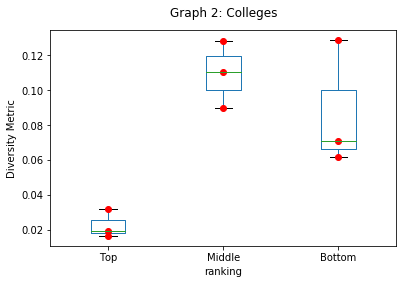

In [308]:
graph2 = df_topmidbot.boxplot(by ='ranking',column =['var'], grid = False) 
plt.plot(df_topmidbot["ranking"]+1, df_topmidbot["var"],'r.',alpha=1,marker='o')
plt.suptitle("Graph 2: Colleges")
plt.title("")
plt.xticks([1, 2, 3], ['Top', 'Middle', 'Bottom'])
graph2.set_ylabel('Diversity Metric')

This graph suggests 3 things:
1. top colleges have low dispersion, and hence have more equal proportions for various races. 
2. as ranking increases, there is more variability in diversity between colleges of similar rankings.
3. While there is an overall increase in the diversity metric, there does not seem to be a linear relationship.

Text(0, 0.5, 'Diversity Metric')

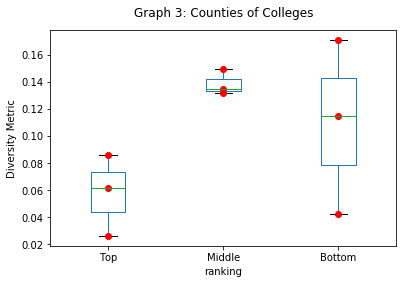

In [309]:
graph3 = df_topmidbot_county.boxplot(by ='ranking', column =['var'], grid = False) 
plt.plot(df_topmidbot_county["ranking"]+1, df_topmidbot_county["var"],'r.',alpha=1,marker='o')
plt.xticks([1, 2, 3], ['Top', 'Middle', 'Bottom'])
plt.suptitle("Graph 3: Counties of Colleges")
plt.title("")
graph3.set_ylabel('Diversity Metric')

This graph suggests 3 things:
1. There is a similar trend in the diversity metric means as in graph 2. The trend of variability is not consistent; however, the counties of the bottom ranked category also have the highest variability.

### Step 2: Compare each of the colleges with their counties

In [311]:
df_topmidbot_county = df_topmidbot_county.set_index("ranking") # set index so same as df_topmidbot_county index
df_summary = df_topmidbot_county["var"].sub(df_topmidbot["var"], axis = 0).to_frame() 
df_summary

var
ranking          
0        6.65e-02
0        9.75e-03
0        2.97e-02
1        2.09e-02
1        6.52e-03
1        5.92e-02
2        4.22e-02
2       -2.85e-02
2        5.32e-02

Text(0, 0.5, 'Difference between College and County Diversity Metric')

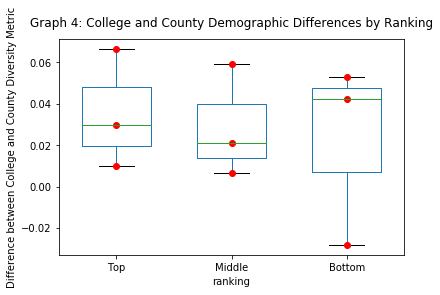

In [312]:
graph4 = df_summary.boxplot(by ='ranking', column =['var'], widths = 0.6,grid = False)
plt.suptitle("Graph 4: College and County Demographic Differences by Ranking")
plt.title("")
plt.plot(df_summary.index+1, df_summary["var"],'r.',alpha=1,marker='o')
plt.xticks([1, 2, 3], ['Top', 'Middle', 'Bottom'])
graph4.set_ylabel('Difference between College and County Diversity Metric')

The graph suggests that there is in fact a slight correlation. As the ranking decreases, the diversity metric of colleges and their surrounding county also decreases somewhat. The correlation seems weak, but we will do a linear regression analysis to determine the extent of this correlation.

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*